---
title: "k-Nearest Neighbors"
author: Daniel Redel
date: today
format:
  html:
    toc: true
    code-fold: false
    html-math-method: katex
jupyter: python3
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Classification

**kNN** is one of the oldest rules with a simple working mechanism and has found many applications since its conception in 1951 (Fix and Hodges, 1951).To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset —its “nearest neighbors.”

## Standard kNN Classifier

Given a positive integer $K$ and a test observation $x_0$, the _kNN Classifier_  does the following:

1. **Identify the** $K$ **points** in the training data that are **closest to** $x_0$, represented by $N_0$.
2. Estimate **Conditional Probability** $\Pr(\cdot)$ for class $j$ as the fraction of the points in $N_0$ whose response values equal to $j$:
$$ \Pr(Y=j|X=x_0)=\frac{1}{K}\sum_{i\in N_0}I(y_i=j) $$
3. kNN applies then **Bayes rule** and classifies the test observation $x_0$ to the class with the largest probability.

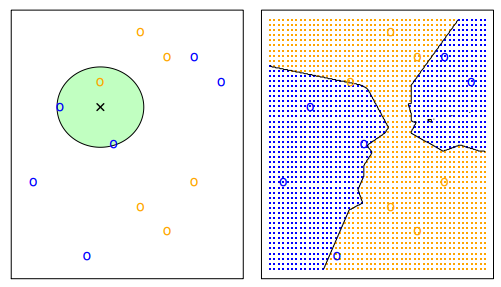

In binary classification applications, it is common to avoid an even k to prevent ties. It is common to see a kNN with k being 3 or 5; however, in general k should be treated as a **hyperparameter** and **tuned via a model selection process** (model selection will be discussed later). 

In general, the larger `k`, the smoother are the decision boundaries. These are boundaries between _decision_ regions.

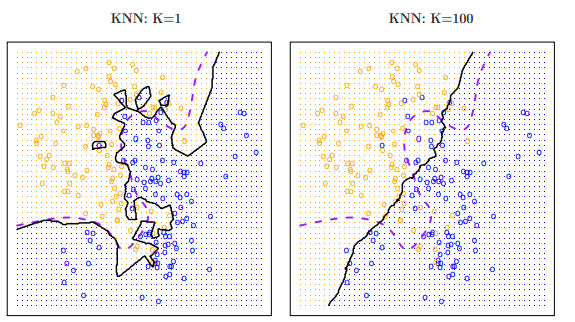

- For example, a $K= 1$ is highly flexible (defined by $\log1/K$), classifying observations based off of the closest nearby training observation. This corresponds to a classifier that has low bias but very high variance.
- $K= 100$ would do the opposite, basing its classification off a large pool of training observations. This corresponds to a low-variance but high-bias classifier.

The **trade-off** between flexibility, training error rate and test error rate applies to both classification and regression problems.

## Model Training

In our previous section we have already seen how kNN classifier is used and implemented in scikit-learn. For illustration purposes, we only consider the first two features or columns in data. Here is the code again to train our model:

In [3]:
#| label: tbl-raw-dataset
#| tbl-cap: Iris Dataset
#| code-fold: true

from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add target
df['target'] = iris.target

# Dictionary
target_names_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Add the target names column to the DataFrame
df['target_names'] = df['target'].map(target_names_dict)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as kNN

# Target vs Inputs
X = df.drop(columns=["target", "target_names"]) # Covariates-Only
y = df["target"] # Target-Outcome

# Train vs Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# 2 Features Only
X_train = X_train[:,[0,1]]
X_test = X_test[:,[0,1]]

# Instantiate Class into Object. Set Parameters
knn = kNN(n_neighbors=3)

# Train Model
knn.fit(X_train, y_train)

# Predict
y_test_pred = knn.predict(X_test)

Recall that we can evaluate the models using the following options:

In [32]:
from sklearn.metrics import accuracy_score
 
# Accuracy_score
print( accuracy_score(y_test_pred, y_test) )                     
# .score
print( knn.score(X_test, y_test) ) 

0.6333333333333333
0.6333333333333333


## The Choice of `k`

Here we examine the effect of `k` on the decision boundaries and accuracy of kNN on our Iris dataset. The following code produces the visualizations of the decision boundaries for `k=1`, `k=3`, `k=9` and `k=36` neighbors:

The accuracy for K=1 on the training data is 0.933
The accuracy for K=1 on the test data is 0.600
The accuracy for K=3 on the training data is 0.892
The accuracy for K=3 on the test data is 0.633
The accuracy for K=9 on the training data is 0.858
The accuracy for K=9 on the test data is 0.700
The accuracy for K=36 on the training data is 0.817
The accuracy for K=36 on the test data is 0.733


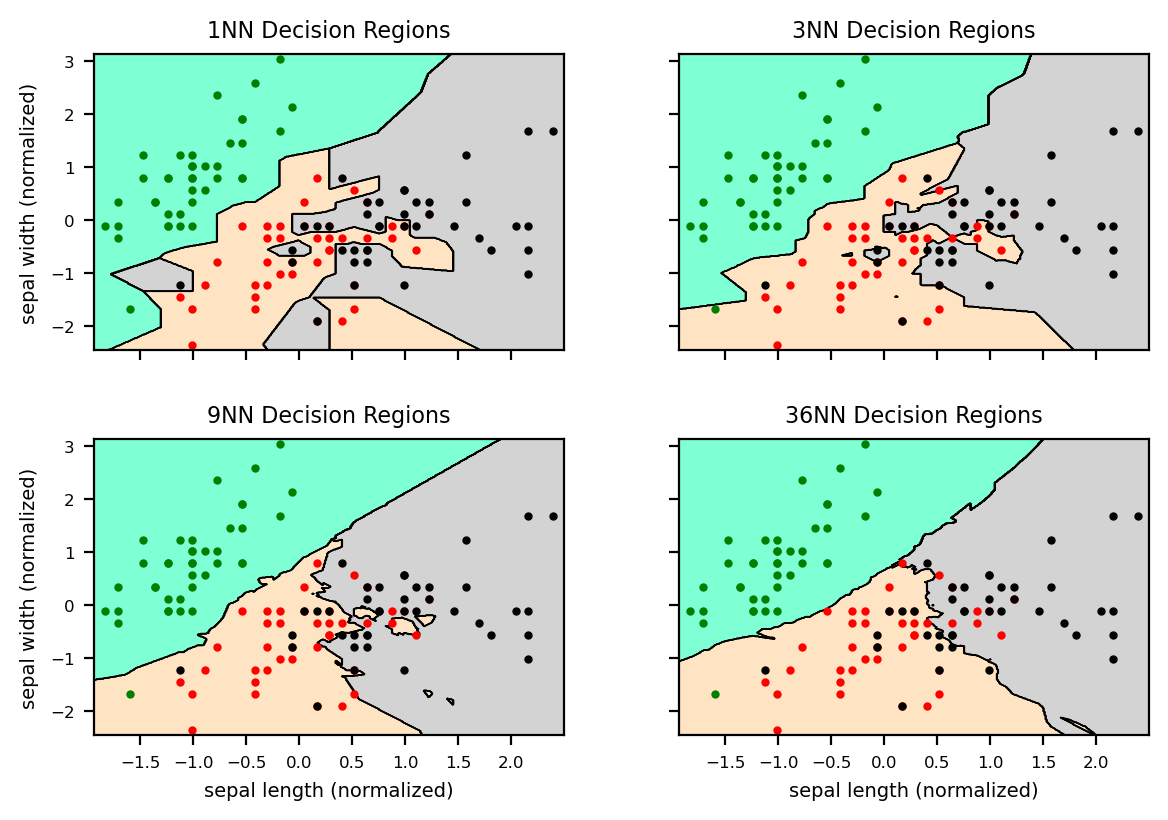

In [10]:
#| label: fig-knn-boundaries1
#| fig-cap: kNN decision regions and boundaries for k = 1,3,9,36 in the Iris dataset

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier as kNN
 
color = ('aquamarine', 'bisque', 'lightgrey')
cmap = ListedColormap(color)

mins = X_train.min(axis=0)- 0.1
maxs = X_train.max(axis=0) + 0.1

x = np.arange(mins[0], maxs[0], 0.01)
y = np.arange(mins[1], maxs[1], 0.01)
X, Y = np.meshgrid(x, y)
coordinates = np.array([X.ravel(), Y.ravel()]).T
 
fig, axs = plt.subplots(2, 2, figsize=(6, 4), dpi = 200)
fig.tight_layout()
K_val = [1, 3, 9, 36]

for ax, K in zip(axs.ravel(), K_val):
 knn = kNN(n_neighbors=K)
 knn.fit(X_train, y_train)
 Z = knn.predict(coordinates)
 Z = Z.reshape(X.shape)
 ax.tick_params(axis='both', labelsize=6)
 ax.set_title(str(K) + 'NN Decision Regions', fontsize=8)
 ax.pcolormesh(X, Y, Z, cmap = cmap, shading='nearest')
 ax.contour(X ,Y, Z, colors='black', linewidths=0.5)
 ax.plot(X_train[y_train==0, 0], X_train[y_train==0, 1],'g.', markersize=4)
 ax.plot(X_train[y_train==1, 0], X_train[y_train==1, 1],'r.', markersize=4)
 ax.plot(X_train[y_train==2, 0], X_train[y_train==2, 1],'k.', markersize=4)
 ax.set_xlabel('sepal length (normalized)', fontsize=7)
 ax.set_ylabel('sepal width (normalized)', fontsize=7)
 print('The accuracy for K={} on the training data is {:.3f}'.format(K, knn.score(X_train, y_train)))
 print('The accuracy for K={} on the test data is {:.3f}'.format(K,knn.score(X_test, y_test)))

for ax in axs.ravel():
 ax.label_outer() 

As we can see in @fig-knn-boundaries1 , a larger value of the hyperparameter `k` generally leads to smoother decision boundaries. That being said, a smoother decision region does not necessarily mean a better classifier performance.

Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed earlier. We will we evaluate training and test set performance with different numbers of neighbors by creating the following loop:

In [19]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 20
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    # Build
    clf = kNN(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # Score in Train
    training_accuracy.append(clf.score(X_train, y_train)) 
    
    # Score in Test
    test_accuracy.append(clf.score(X_test, y_test))

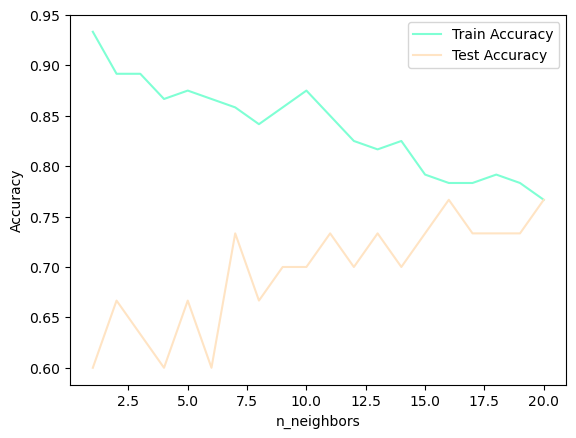

In [25]:
#| label: fig-knn-accuracy
#| fig-cap: Comparison of training and test accuracy as a function of n_neighbors
#| code-fold: true

# Setup
color = ('aquamarine', 'bisque', 'lightgrey')

# Plot
plt.plot(neighbors_settings, training_accuracy, label="Train Accuracy", color=color[0])
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy", color=color[1])

# Labels
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Show
plt.show()

In @fig-knn-accuracy we see that when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors indicating that using the single nearest neighbor leads to a model that is too complex.

## The Choice of Distance

To identify the nearest neighbors of an observation, there are various choices of distance metrics that can be used. Three popular choices of distances are `Euclidean`, `Manhattan`, and `Minkowski`.

In `KNeighborsClassifier`, the choice of distance is determined by the `metric` parameter. Although the default metric in `KNeighborsClassifier` is `Minkowski`, there is another parameter `p`, which determines the order of the Minkowski distance, and has a default value of $2$. This means that the **default** metric of `KNeighborsClassifier` is indeed the **Euclidean distance**.

# Regression

## Standard kNN Regressor

The **kNN regression** method is closely related to the KNN classifier discussed in above. Given a value for $K$ and a prediction point $x_0$, kNN regression first identifies the $K$ training observations that are closest to $x_0$, represented by $N_0$. It then estimates $f(x_0)$ using the average of all the training responses in $N_0$. In other words,

$$
\hat y = \hat f(x_0) = \frac{1}{K}\sum_{x_i \in N_0} y_i
$$

Here $\hat f(x_0)$ is written to emphasize that function $f(x)$ is essentially an estimator of $y$. 

To examine the kNN functionality in regression, we will use another well-known dataset that suits regression applications.

## California Housing dataset

Here we use the **California Housing** dataset, which includes the median house price (in $100,000) of 20,640 California districts with 8 features that can be used to predict the house price. 

In [35]:
#| label: tbl-raw-california
#| tbl-cap: California Housing Dataset
#| code-fold: true

from sklearn import datasets
california = datasets.fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)
# Add target
df['target'] = california.target

# Add the target names column to the DataFrame
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Model Training

 Now we are in the position to train our model. The standard kNN regressor is implemented in in the `KNeighborsRegressor` class in the `sklearn.neighbors` module. We train a standard `k=50`. Here **we do not stratify**.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor as kNN

# Target vs Inputs
X = df.drop(columns=["target"]) # Covariates-Only
y = df["target"] # Target-Outcome

# Train vs Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# 2 Features Only

# Instantiate Class into Object. Set Parameters
knn = kNN(n_neighbors=50)

# Train Model
knn.fit(X_train, y_train)

# Predict
y_test_pred = knn.predict(X_test)

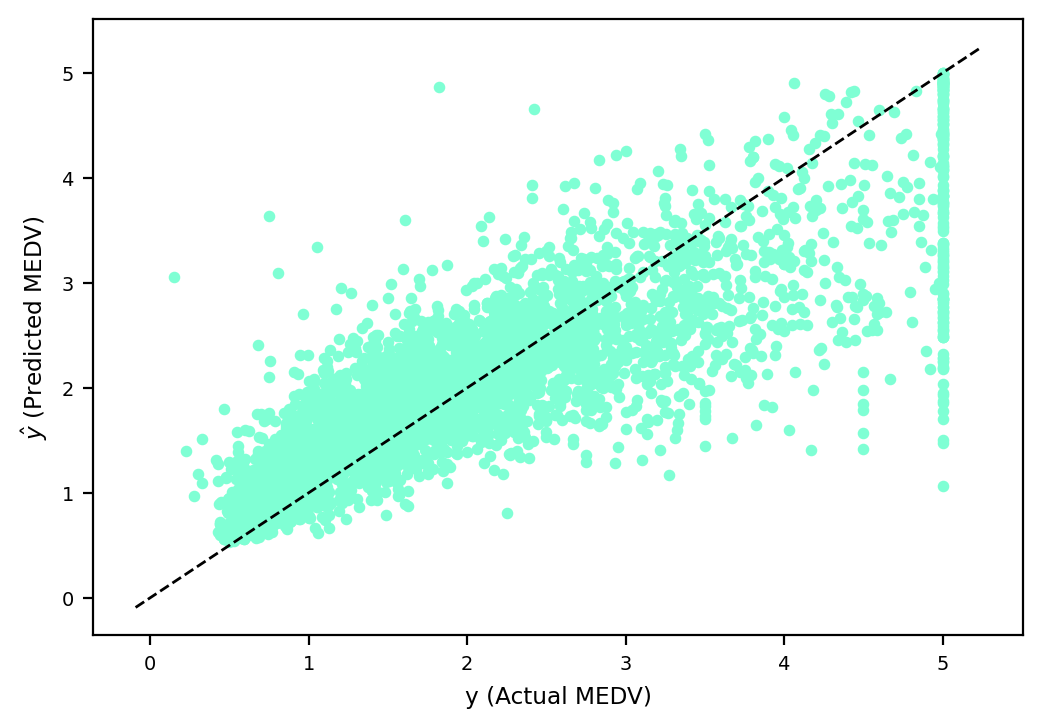

In [60]:
#| label: fig-knn-regressor
#| fig-cap: Predicted targets (k=50) vs. the actual targets in the California Housing dataset.
#| code-fold: true

# Setup
plt.figure(figsize=(6, 4), dpi = 200)

# Figures
plt.scatter(y_test, y_test_pred, color=color[0],s=10)
lim_left, lim_right = plt.xlim()
plt.plot([lim_left, lim_right], [lim_left, lim_right], '--k', linewidth=1)

# Label
plt.xlabel("y (Actual MEDV)", fontsize='small')
plt.ylabel("$\hat{y}$ (Predicted MEDV)", fontsize='small')
plt.tick_params(axis='both', labelsize=7)

# Show
plt.show()

 In @fig-knn-regressor, we can see that, for example, when MEDV is lower than $100k, our model is generally overestimating the target; however, for
 large values of MEDV(e.g., around $500k), our model is underestimating the target.

## Model Evaluation

As previously discussed, all classifiers in `scikit-learn` have a that given a test data and their labels, returns a measure of classifier performance. For regressors the **default** score method is the $R^2$ statistics, given by:

$$
\hat R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

where RSS and TSS are short for Residual Sum of Squares and Total Sum of Squares, respectively.

In [62]:
print( 'The test R^2 is:', knn.score(X_test, y_test).round(2) )

The test R^2 is: 0.68


Alternatively, we can use the `r2_score` from `sklearn.metrics`. This compares the **actual data** vs **predicted data**:

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

print( 'The test R^2 is:', r2_score(y_test, y_test_pred).round(2) )

The test R^2 is: 0.68


Other common score is the **Mean Squared Error** (MSE):

$$
\text{MSE}=\frac{1}{n}\sum_{i=1}^{n}[y_i-\hat{f}(x_i)]^{2}
$$

A small MSE indicates the predicted responses are very close to the true ones. To use this, we run the `mean_squared_error` function from `sklearn.metrics`:

In [71]:
print( 'The test MSE is:', mean_squared_error(y_test, y_test_pred).round(2) )

The test MSE is: 0.42
